In [1]:
%load_ext autoreload
%autoreload 1

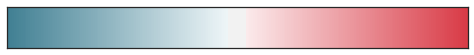

In [2]:
# base libs
import numpy as np
import pandas as pd

pd.options.display.max_columns = 500
pd.options.display.max_rows = 100

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style='white')
cmap = sns.choose_diverging_palette(as_cmap=True)

In [3]:
%aimport dasci.data.explore
%aimport dasci.model.common

import dasci.data.explore as expl
import dasci.model.common as model

In [4]:
df = pd.read_pickle(expl.full_path_name(r'output\train-fe-basic.pickle'))

# Modeling

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeRegressor

In [9]:
df = model.encode(df)

X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

numerical_features = df.select_dtypes(exclude = ["object"]).columns.tolist()
numerical_features.remove("SalePrice")

scaler = StandardScaler()
X_train.loc[:, numerical_features] = scaler.fit_transform(X_train.loc[:, numerical_features])
X_test.loc[:, numerical_features] = scaler.transform(X_test.loc[:, numerical_features])

C:\Users\Max\Miniconda3\envs\becoming-data-scientist\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\Max\Miniconda3\envs\becoming-data-scientist\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


parameters: {'max_leaf_nodes': 52}
RMSE on Train set : 0.12171589390428525
[0.22559888 0.18307683 0.18724594 0.18014828 0.19147637]
RMSE on Training set (CV) : 0.1935092590137795
RMSE on Test set : 0.2041605464591838


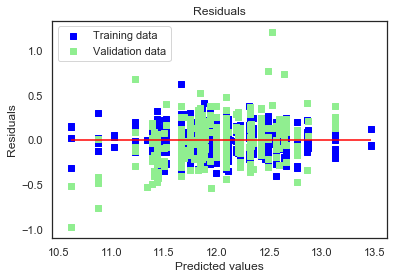

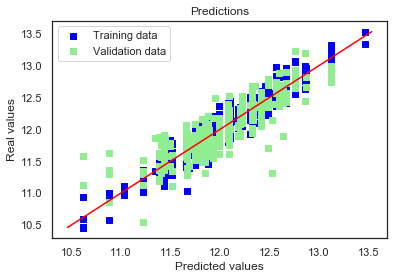

In [10]:
tree = DecisionTreeRegressor(random_state=0)

max_leaf_nodes = range(2, 200, 5)
param_grid = {"max_leaf_nodes": max_leaf_nodes }
grid_search = GridSearchCV(tree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f"parameters: {grid_search.best_params_}")

print(f"RMSE on Train set : {model.rmse(y_train, grid_search.predict(X_train))}")

print(f"RMSE on Training set (CV) : {model.rmse_cv(grid_search.best_estimator_, X_train, y_train)}") 
print(f"RMSE on Test set : {model.rmse(y_test, grid_search.predict(X_test))}")

model.plot_residual(grid_search.predict(X_train), y_train, grid_search.predict(X_test), y_test)
model.plot_predictions(grid_search.predict(X_train), y_train, grid_search.predict(X_test), y_test)

RMSE on Train set : 0.08668229469760723
[0.18526635 0.15975723 0.1454594  0.14529182 0.13550968]
RMSE on Training set (CV) : 0.15425689751424962
RMSE on Test set : 0.14562470779828393


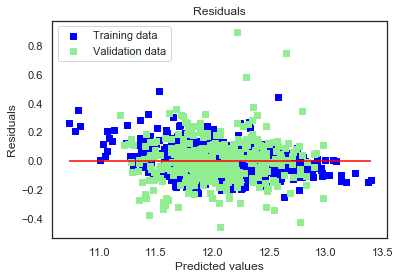

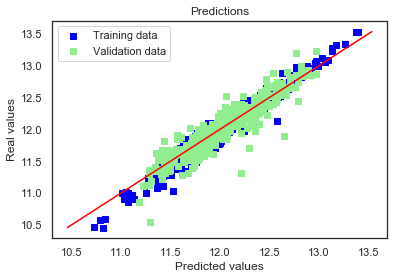

In [11]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(max_depth=7, random_state=0, n_estimators=100)
forest.fit(X_train, y_train)

print(f"RMSE on Train set : {model.rmse(y_train, forest.predict(X_train))}")

print(f"RMSE on Training set (CV) : {model.rmse_cv(forest, X_train, y_train)}") 
print(f"RMSE on Test set : {model.rmse(y_test, forest.predict(X_test))}")

model.plot_residual(forest.predict(X_train), y_train, forest.predict(X_test), y_test)
model.plot_predictions(forest.predict(X_train), y_train, forest.predict(X_test), y_test)

RMSE on Train set : 0.1107228631470239
[0.18196504 0.16321473 0.15265552 0.1353202  0.14025562]
RMSE on Training set (CV) : 0.15468222197014947
RMSE on Test set : 0.1393942967245256


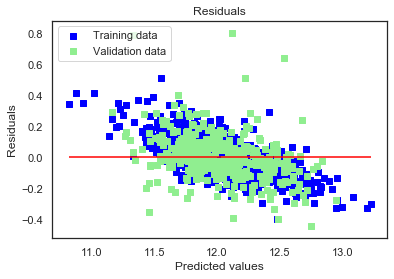

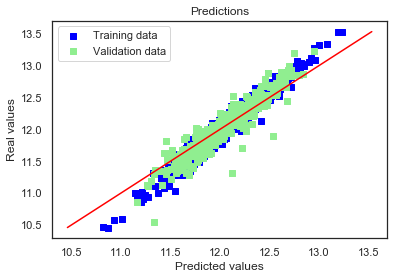

In [12]:
from sklearn.ensemble import GradientBoostingRegressor

xgBoosting = GradientBoostingRegressor(n_estimators=200, max_depth=5, min_samples_split=2,
          learning_rate=0.01, loss='ls', random_state=0, subsample=0.5)
xgBoosting.fit(X_train, y_train)

print(f"RMSE on Train set : {model.rmse(y_train, xgBoosting.predict(X_train))}")

print(f"RMSE on Training set (CV) : {model.rmse_cv(xgBoosting, X_train, y_train)}") 
print(f"RMSE on Test set : {model.rmse(y_test, xgBoosting.predict(X_test))}")

model.plot_residual(xgBoosting.predict(X_train), y_train, xgBoosting.predict(X_test), y_test)
model.plot_predictions(xgBoosting.predict(X_train), y_train, xgBoosting.predict(X_test), y_test)